<a href="https://colab.research.google.com/github/HV-ER30/Neopat/blob/master/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [ ]:
df = pd.read_csv("/content/BRITANNIA.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11,NaN,NaN,NaN
1,2000-01-04,BRITANNIA,EQ,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11,NaN,NaN,NaN
2,2000-01-05,BRITANNIA,EQ,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11,NaN,NaN,NaN
3,2000-01-06,BRITANNIA,EQ,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12,NaN,NaN,NaN
4,2000-01-07,BRITANNIA,EQ,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12,NaN,NaN,NaN


In [ ]:
df.describe()
df.count()

Date                  5305
Symbol                5305
Series                5305
Prev Close            5305
Open                  5305
High                  5305
Low                   5305
Last                  5305
Close                 5305
VWAP                  5305
Volume                5305
Turnover              5305
Trades                2456
Deliverable Volume    4796
%Deliverble           4796
dtype: int64

In [ ]:
print(df.head())
print(df.shape)
print(df.columns)

         Date     Symbol Series  Prev Close   Open    High    Low   Last  \
0  2000-01-03  BRITANNIA     EQ      703.25  705.0  759.50  705.0  758.0   
1  2000-01-04  BRITANNIA     EQ      756.90  710.0  770.00  710.0  740.0   
2  2000-01-05  BRITANNIA     EQ      754.55  755.0  759.00  705.0  740.0   
3  2000-01-06  BRITANNIA     EQ      735.30  740.0  794.15  740.0  770.0   
4  2000-01-07  BRITANNIA     EQ      785.65  808.0  848.50  798.0  848.5   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  756.90  741.01    7512  5.566488e+11     NaN                 NaN   
1  754.55  742.52    8135  6.040391e+11     NaN                 NaN   
2  735.30  739.92    6095  4.509784e+11     NaN                 NaN   
3  785.65  788.83   19697  1.553756e+12     NaN                 NaN   
4  848.50  827.53   33107  2.739708e+12     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
(5305, 15)
Ind

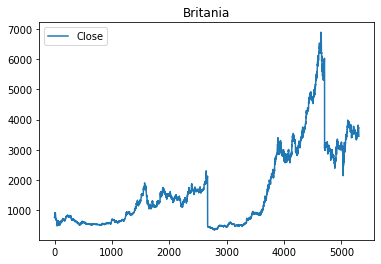

In [38]:
df[['Close']].plot()
plt.title("Britania")
plt.show()

Text(0.5, 1.0, 'Britania Cumulative Returns')

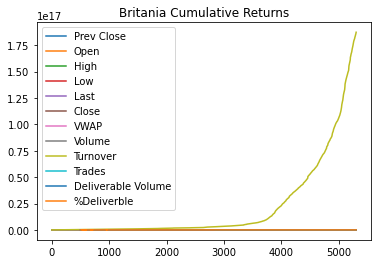

In [39]:
dr = df.cumsum()
dr.plot()
plt.title('Britania Cumulative Returns')

Text(0.5, 1.0, 'Britania Autocorrelation plot')

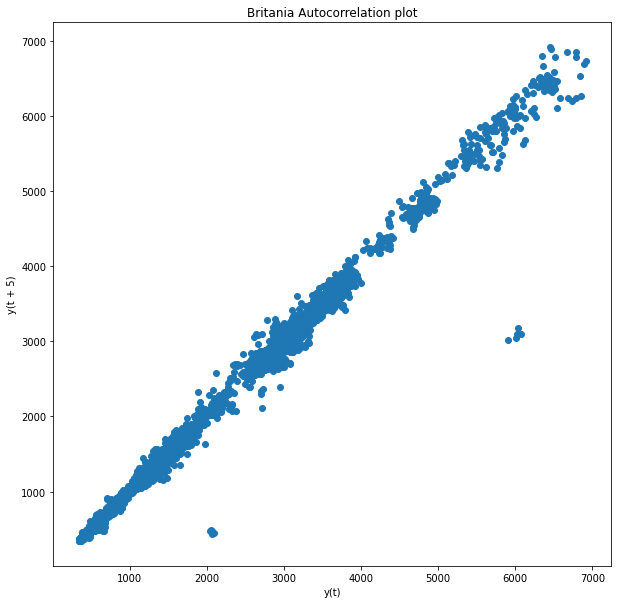

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Britania Autocorrelation plot')

In [ ]:
df['Date'][5304]

'2021-04-30'

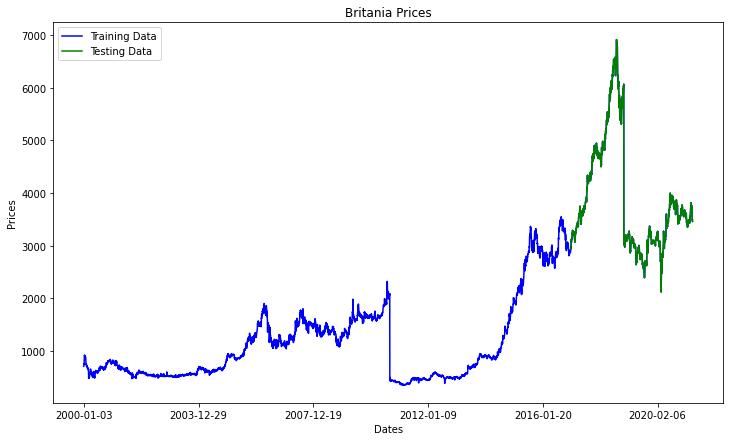

In [22]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Britania Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,5304, 1000), df['Date'][0:5304:1000])
plt.legend()

In [23]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

ARIMA Model

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
model=ARIMA(df['Prev Close'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Prev Close   No. Observations:                 5304
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -29004.112
Method:                       css-mle   S.D. of innovations             57.364
Date:                Wed, 26 Oct 2022   AIC                          58016.224
Time:                        07:13:26   BIC                          58042.529
Sample:                             1   HQIC                         58025.416
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5214      0.780      0.669      0.504      -1.007       2.050
ar.L1.D.Prev Close    -0.2316      0.623     -0.372      0.710      -1.452       0.989
ma.L1.D.Prev Close     0.2193      0.624      0.351      0.725      -1.005       1.443
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.3169           +0.0000j            4.3169            0.5000
MA.1           -4.5593           +0.0000j            4.5593            0.5000
-----------------------------------------------------------------------------
"""

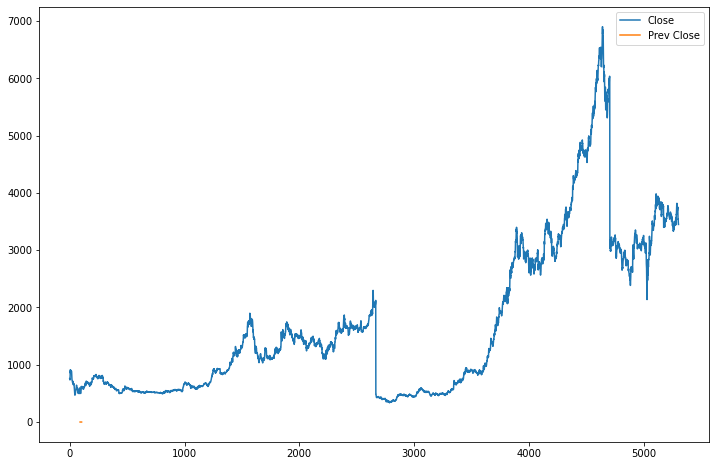

In [31]:
df['Prev Close']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Close','Prev Close']].plot(figsize=(12,8))

SARIMA Model

In [32]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Prev Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


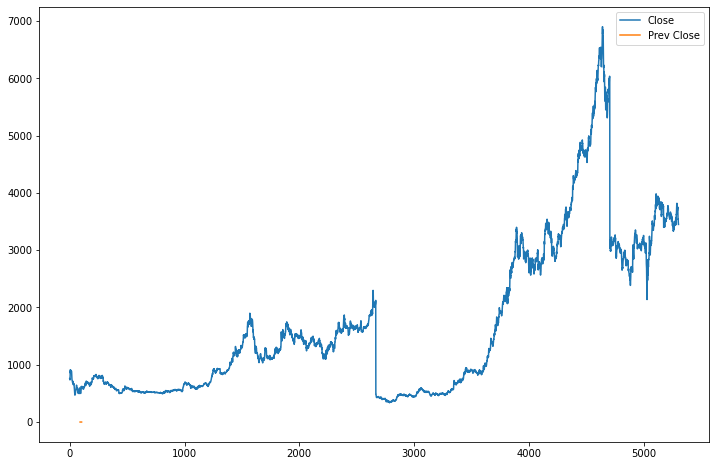

In [33]:
df['Prev Close']=results.predict(start=90,end=103,dynamic=True)
df[['Close','Prev Close']].plot(figsize=(12,8))